In [1]:
resolution = '2.2km'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Function to calculate PDF from a single file
def calculate_pdf(file_name, filter_small_vals, bins=50):
    # Get the data
    precipitation_data = np.load(file_name)
    # Remove NAN values
    precipitation_data = precipitation_data[~np.isnan(precipitation_data)]
    # 
#     freqs, bin_edges = np.histogram(precipitation_data, bins=bins, density=True)
    freqs, bin_edges = np.histogram(precipitation_data, bins=bins_i_want, density=True)
    # I think this was just for knowing how many value was in each bin
    # How was I using that in log_discrete_histogram_less_legend???
    # freqs_numbers, bin_edges = np.histogram(precipitation_data, bins= bins, density=False)
    
    # 
    #n_bins = str(len(bin_edges))
    # Find the centre point of each bin for plotting
    bin_centres =  0.5*(bin_edges[1:] + bin_edges[:-1])    
    
    return freqs, bin_centres


# Function to calculate PDF from a single file
def calculate_pdf_wetvalues (file_name, filter_small_vals=False ,bins=50):
    # Get the data
    precipitation_data = np.load(file_name)
    # Remove NAN values
    precipitation_data = precipitation_data[~np.isnan(precipitation_data)]
    # Keep only wet values 
    precipitation_data = precipitation_data[precipitation_data >= 0.1]
    
    if filter_small_vals == True:
        precipitation_data = precipitation_data[precipitation_data >= 0.5]
        precipitation_data = precipitation_data[precipitation_data <= 1.5]
    
    freqs, bin_edges = np.histogram(precipitation_data, bins=bins_i_want, density=True)
    # I think this was just for knowing how many value was in each bin
    # How was I using that in log_discrete_histogram_less_legend???
    # freqs_numbers, bin_edges = np.histogram(precipitation_data, bins= bins, density=False)
    
    # 
    #n_bins = str(len(bin_edges))
    # Find the centre point of each bin for plotting
    bin_centres =  0.5*(bin_edges[1:] + bin_edges[:-1])    
    
    return freqs, bin_centres

In [3]:
# Issue with this is that the bin centres is based on the final one

## Just wet values - OVERLAPPING PERIOD

In [4]:
bins_i_want  =  [3, 7, 10,15, 21, 35,45, 62, 78]
# bins_i_want  =  [1 ,7,10,15, 21, 35,45, 62, 78]
bin_num = len(bins_i_want)-1

In [5]:
# # Initialize variables to accumulate PDF
total_pdf_cehgear_wv_o = np.zeros(bin_num)  # Assuming 50 bins for the histogram
total_bin_centers_cehgear_wv_o = None
 
# Process each file and accumulate PDF
datadir = f'/nfs/a319/gy17m2a/PhD/ProcessedData/TimeSeries/CEH-GEAR/{resolution}/NearestNeighbour/'
for yr in range(1990,2001):
    print(yr)
    file_name = datadir + f"{yr}_compressed.npy"
    pdf_cehgear_wv, bin_centers_cehgear_wv = calculate_pdf_wetvalues(file_name, bin_num)
    total_pdf_cehgear_wv_o += pdf_cehgear_wv
    total_bin_centers_cehgear_wv_o = bin_centers_cehgear_wv

1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000


### UKCP18 - 2.2km

In [6]:
# Initialize variables to accumulate PDF
total_pdf_wv_2_2km_o = np.zeros(bin_num)  # Assuming 50 bins for the histogram
total_bin_centers_wv_2_2km_o = None

ems = ['01', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '15']
 
# Process each file and accumulate PDF
for em in ems:
    print(em)
    datadir = f'/nfs/a319/gy17m2a/PhD/ProcessedData/TimeSeries/UKCP18_hourly/2.2km/1980_2001/{em}/'
    for yr in range(1990,2001):
        file_name = datadir + f"compressed_{yr}.npy"
        pdf_wv_2_2km, bin_centers_wv_2_2km = calculate_pdf_wetvalues(file_name, bin_num)
        total_pdf_wv_2_2km_o += pdf_wv_2_2km
        total_bin_centers_wv_2_2km_o = bin_centers_wv_2_2km
        # print(bin_centers)

01
04
05
06
07
08
09
10
11
12
13
15


## Plot

### Not overlappingperiod

In [19]:
bins_i_want  =  [3, 7, 10,15, 21, 35,45, 62, 78]
bin_num = len(bins_i_want) -1

In [24]:
# # Initialize variables to accumulate PDF
total_pdf_cehgear_wv_no = np.zeros(bin_num)  # Assuming 50 bins for the histogram
total_bin_centers_cehgear_wv_no = None
 
# Process each file and accumulate PDF
datadir = f'/nfs/a319/gy17m2a/PhD/ProcessedData/TimeSeries/CEH-GEAR/{resolution}/NearestNeighbour/'
for yr in range(1990,2001):
    # print(yr)
    file_name = datadir + f"{yr}_compressed.npy"
    pdf_cehgear_wv, bin_centers_cehgear_wv = calculate_pdf_wetvalues(file_name, bin_num)
    total_pdf_cehgear_wv_no += pdf_cehgear_wv
    total_bin_centers_cehgear_wv_no = bin_centers_cehgear_wv

In [21]:
# Initialize variables to accumulate PDF
total_pdf_wv_2_2km_no = np.zeros(bin_num)  # Assuming 50 bins for the histogram
total_bin_centers_wv_2_2km_no = None

ems = ['01', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '15']
 
# Process each file and accumulate PDF
for em in ems:
    print(em)
    datadir = f'/nfs/a319/gy17m2a/PhD/ProcessedData/TimeSeries/UKCP18_hourly/2.2km/1980_2001/{em}/'
    for yr in range(1990,2001):
        file_name = datadir + f"compressed_{yr}.npy"
        pdf_wv_2_2km, bin_centers_wv_2_2km = calculate_pdf_wetvalues(file_name, bin_num)
        total_pdf_wv_2_2km_no += pdf_wv_2_2km
        total_bin_centers_wv_2_2km_no = bin_centers_wv_2_2km
        # print(bin_centers)

01
04
05
06
07
08
09
10
11
12
13
15


### Both overlapping and not overlapping in one plot

Text(0.5,1,'Not overlapping period')

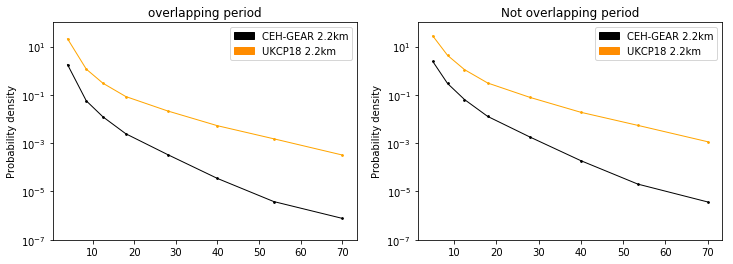

In [28]:
# Draw the plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

axs[0].scatter(total_bin_centers_cehgear_wv_o, total_pdf_cehgear_wv_o ,linewidth = 1,s=3, color = 'black')
axs[0].plot(total_bin_centers_cehgear_wv_o, total_pdf_cehgear_wv_o ,linewidth = 1, color = 'black')
axs[0].scatter(total_bin_centers_wv_2_2km_o, total_pdf_wv_2_2km_o ,linewidth = 1,s=3, color = 'orange')
axs[0].plot(total_bin_centers_wv_2_2km_o, total_pdf_wv_2_2km_o ,linewidth = 1, color = 'orange')

axs[1].scatter(total_bin_centers_cehgear_wv_no, total_pdf_cehgear_wv_no ,linewidth = 1,s=3, color = 'black')
axs[1].plot(total_bin_centers_cehgear_wv_no, total_pdf_cehgear_wv_no ,linewidth = 1, color = 'black')
axs[1].scatter(total_bin_centers_wv_2_2km_no, total_pdf_wv_2_2km_no ,linewidth = 1,s=3, color = 'orange')
axs[1].plot(total_bin_centers_wv_2_2km_no, total_pdf_wv_2_2km_no ,linewidth = 1, color = 'orange')

# Create patches
patches= []
patch1 = mpatches.Patch(color= 'black', label='CEH-GEAR 2.2km')
patch2 = mpatches.Patch(color= 'darkorange', label='UKCP18 2.2km')
patches.append(patch1)
patches.append(patch2)

axs[0].legend(handles=patches)
axs[0].set_ylabel('Probability density')
axs[0].set_ylim(1e-7,100)
axs[0].set_yscale('log')
axs[0].set_xscale('linear')    
axs[0].set_title('overlapping period')

axs[1].legend(handles=patches)
axs[1].set_ylabel('Probability density')
axs[1].set_ylim(1e-7,100)
axs[1].set_yscale('log')
axs[1].set_xscale('linear')    
axs[1].set_title('Not overlapping period')
# fig.savefig("Figs/RCMvsCPMvsObs/CEH-GEARvsUKCP18_2.2km_1,7bins.png")

## Low values
### CEH-GEAR

In [11]:
# bins_i_want =  [0.65,0.75,0.85,0.95,1.05,1.15]
# bin_num=len(bins_i_want)-1
# # # Initialize variables to accumulate PDF
# total_pdf_cehgear_wv_low = np.zeros(bin_num)  # Assuming 50 bins for the histogram
# total_bin_centers_cehgear_wv_low = None
 
# # Process each file and accumulate PDF
# datadir = f'/nfs/a319/gy17m2a/PhD/ProcessedData/TimeSeries/CEH-GEAR/{resolution}/NearestNeighbour/'
# for yr in range(1990,2001):
#     print(yr)
#     file_name = datadir + f"{yr}_compressed.npy"
#     pdf_cehgear_wv_low, bin_centers_cehgear_wv_low = calculate_pdf_wetvalues(file_name,True, bin_num)
#     total_pdf_cehgear_wv_low += pdf_cehgear_wv_low
#     total_bin_centers_cehgear_wv_low = bin_centers_cehgear_wv_low

### UKCP18 - 2.2km

In [12]:
# # Initialize variables to accumulate PDF
# total_pdf_wv_2_2km_low = np.zeros(bin_num)  # Assuming 50 bins for the histogram
# total_bin_centers_wv_2_2km_low = None

# ems = ['01', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '15']
 
# # Process each file and accumulate PDF
# for em in ems:
#     print(em)
#     datadir = f'/nfs/a319/gy17m2a/PhD/ProcessedData/TimeSeries/UKCP18_hourly/2.2km/1980_2001/{em}/'
#     for yr in range(1990,2001):
#         file_name = datadir + f"compressed_{yr}.npy"
#         pdf_wv_2_2km_low, bin_centers_wv_2_2km_low = calculate_pdf_wetvalues(file_name, bin_num)
#         total_pdf_wv_2_2km_low += pdf_wv_2_2km_low
#         total_bin_centers_wv_2_2km_low = bin_centers_wv_2_2km_low
#         # print(bin_centers)

### Plot

In [13]:
# # Draw the plot
# fig, ax = plt.subplots()
# ax.scatter(total_bin_centers_cehgear_wv_low, total_pdf_cehgear_wv_low ,linewidth = 1,s=3, color = 'black')
# ax.plot(total_bin_centers_cehgear_wv_low, total_pdf_cehgear_wv_low ,linewidth = 1, color = 'black')

# ax.scatter(total_bin_centers_wv_2_2km_low, total_pdf_wv_2_2km_low ,linewidth = 1,s=3, color = 'orange')
# ax.plot(total_bin_centers_wv_2_2km_low, total_pdf_wv_2_2km_low ,linewidth = 1, color = 'orange')

# # Create patches
# patches= []
# patch1 = mpatches.Patch(color= 'black', label='CEH-GEAR')
# patch2 = mpatches.Patch(color= 'darkorange', label='UKCP18')
# patches.append(patch1)
# patches.append(patch2)

# ax.legend(handles=patches)
# # ax.set_xlabel(precip_variable)
# ax.set_ylabel('Probability density')
# # ax.set_xlim(0,80)
# # if xlim != False:
# #     ax.set_xlim(0,xlim)
# #plt.title(n_bins + " bins")
# # ax.set_yscale('log')
# ax.set_xscale('linear')    
